# Load module


In [1]:
import glob
import os
import math
import joblib
import lightgbm as lgb
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_val_predict
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

print(os.listdir("../../../data/house"))
print(glob.glob('*.pkl'))

['ames_shallow_fe.pickle', 'ames.pickle', 'ames_shallow_fe_indexers.pickle', 'descriptions.pickle', 'ames.csv', 'description.txt']
[]


# Load data


In [2]:
filename = '../../../data/house/ames_shallow_fe.pickle'
df = joblib.load(filename)
df.head(3)

p_i_d  area   price m_s_sub_class  m_s_zoning  lot_frontage  lot_area  \
0  526350040   896  105000            20           0          80.0     11622   
1  526351010  1329  172000            20           1          81.0     14267   
2  526353030  2110  244000            20           1          93.0     11160   

   lot_shape  land_contour  lot_config  ...  pool_area  fence  misc_feature  \
0          0             0           0  ...          0      0             0   
1          1             0           1  ...          0      1             1   
2          0             0           1  ...          0      1             0   

   misc_val  mo_sold  yr_sold  sale_type  sale_condition  log_price  total_s_f  
0         0        6     2010          0               0  11.561725     1778.0  
1     12500        6     2010          0               0  12.055256     2658.0  
2         0        4     2010          0               0  12.404928     4220.0  

[3 rows x 79 columns]

# pyGAM

## pyGAM 적용을 위해 numerical 과 categorical 로 구분

In [3]:
len(df.select_dtypes(include='number').columns)

76

In [4]:
len(df.select_dtypes(include='object').columns)

3

In [5]:
X = df.drop(['p_i_d', 'log_price', 'price'], axis=1)
y = df.price

# X_num = pd.concat([X.select_dtypes(include='number'), X.select_dtypes(include='object')], axis = 1).to_numpy().select_dtypeset
# X_num = X.select_dtypes(include='number').to_numpy().setflags(write=True)
X_num = X.select_dtypes(include='number').to_numpy()
# X_num = X.select_dtypes(include='number').values
y = y.to_numpy()

In [73]:
X_num

array([[8.960e+02, 0.000e+00, 8.000e+01, ..., 0.000e+00, 0.000e+00,
        1.778e+03],
       [1.329e+03, 1.000e+00, 8.100e+01, ..., 0.000e+00, 0.000e+00,
        2.658e+03],
       [2.110e+03, 1.000e+00, 9.300e+01, ..., 0.000e+00, 0.000e+00,
        4.220e+03],
       ...,
       [9.700e+02, 1.000e+00, 6.200e+01, ..., 0.000e+00, 0.000e+00,
        1.882e+03],
       [1.389e+03, 1.000e+00, 7.700e+01, ..., 0.000e+00, 0.000e+00,
        2.778e+03],
       [2.000e+03, 1.000e+00, 7.400e+01, ..., 0.000e+00, 0.000e+00,
        2.996e+03]])

## Numerical value 만 pyGAM에 적용
+ numerical : 73개
+ categorical : 3개
+ R2 = 0.95

In [9]:
from pygam import LinearGAM, s, f
gam_num = LinearGAM().gridsearch(X_num, y)


100% (11 of 11) |########################| Elapsed Time: 0:01:18 Time:  0:01:18


In [38]:
gam_num.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    204.1303
Link Function:                     IdentityLink Log Likelihood:                                -59281.7208
Number of Samples:                         2885 AIC:                                           118973.7022
                                                AICc:                                          119005.2704
                                                GCV:                                        383390270.3392
                                                Scale:                                      334892050.1649
                                                Pseudo R-Squared:                                   0.9499
Feature Function                  Lam

<ipython-input-38-62e29b81f588>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_num.summary()


## pyGAM 에 categorical 추가

In [70]:
X

area m_s_sub_class  m_s_zoning  lot_frontage  lot_area  lot_shape  \
0      896            20           0          80.0     11622          0   
1     1329            20           1          81.0     14267          1   
2     2110            20           1          93.0     11160          0   
3     1629            60           1          74.0     13830          1   
4     1604            60           1          78.0      9978          1   
...    ...           ...         ...           ...       ...        ...   
2883  1003            80           1          37.0      7937          1   
2884   902            20           1          74.0      8885          1   
2885   970            85           1          62.0     10441          0   
2886  1389            20           1          77.0     10010          0   
2887  2000            60           1          74.0      9627          0   

      land_contour  lot_config  land_slope  neighborhood  ...  screen_porch  \
0                0           0           0             0  ...           120   
1                0           1           0             0  ...             0   
2                0           1           0             0  ...             0   
3                0           0           0             1  ...             0   
4                0           0           0             1  ...             0   
...            ...         ...         ...           ...  ...           ...   
2883             0           2           0            22  ...             0   
2884             3           0           1            22  ...             0   
2885             0           0           0            22  ...             0   
2886             0           0           1            22  ...             0   
2887             0           0           1            22  ...             0   

      pool_area  fence  misc_feature  misc_val  mo_sold  yr_sold  sale_type  \
0             0      0             0         0        6     2010          0   
1             0      1             1     12500        6     2010          0   
2             0      1             0         0        4     2010          0   
3             0      0             0         0        3     2010          0   
4             0      1             0         0        6     2010          0   
...         ...    ...           ...       ...      ...      ...        ...   
2883          0      2             0         0        3     2006          0   
2884          0      0             0         0        6     2006          0   
2885          0      0             2       700        7     2006          0   
2886          0      1             0         0        4     2006          0   
2887          0      1             0         0       11     2006          0   

      sale_condition  total_s_f  
0                  0     1778.0  
1                  0     2658.0  
2                  0     4220.0  
3                  0     2557.0  
4                  0     2530.0  
...              ...        ...  
2883               0     2006.0  
2884               0     1766.0  
2885               0     1882.0  
2886               0     2778.0  
2887               0     2996.0  

[2885 rows x 76 columns]

In [52]:
X_all = pd.concat([X.select_dtypes(include='number'),
                  X.select_dtypes(include='object')], axis=1).values
# X_all
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns
tot_cols = list(num_cols) + list(cat_cols)

In [54]:
tot_cols

['area',
 'm_s_zoning',
 'lot_frontage',
 'lot_area',
 'lot_shape',
 'land_contour',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod_add',
 'roof_style',
 'roof_matl',
 'exterior1st',
 'exterior2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmt_fin_type1',
 'bsmt_fin_s_f1',
 'bsmt_fin_type2',
 'bsmt_fin_s_f2',
 'bsmt_unf_s_f',
 'total_bsmt_s_f',
 'heating',
 'heating_q_c',
 'central_air',
 'electrical',
 'x1st_flr_s_f',
 'x2nd_flr_s_f',
 'low_qual_fin_s_f',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abv_gr',
 'kitchen_abv_gr',
 'kitchen_qual',
 'tot_rms_abv_grd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'wood_dec

In [11]:
y.shape

(2885,)

In [12]:
X_all.shape

(2885, 76)

In [13]:
gam = LinearGAM().fit(X_all, y)

In [14]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    495.9405
Link Function:                     IdentityLink Log Likelihood:                                -58873.4874
Number of Samples:                         2885 AIC:                                           118740.8557
                                                AICc:                                          118948.1793
                                                GCV:                                        417507824.9692
                                                Scale:                                      290704019.1236
                                                Pseudo R-Squared:                                   0.9613
Feature Function                  Lam

<ipython-input-14-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [53]:
gam = LinearGAM(s(0)  
+s(1) 
+s(2) 
+s(3) 
+s(4) 
+s(5) 
+s(6) 
+s(7) 
+s(8) 
+s(9) 
+s(10)
+s(11)
+s(12)
+s(13)
+s(14)
+s(15)
+s(16)
+s(17)
+s(18)
+s(19)
+s(20)
+s(21)
+s(22)
+s(23)
+s(24)
+s(25)
+s(26)
+s(27)
+s(28)
+s(29)
+s(30)
+s(31)
+s(32)
+s(33)
+s(34)
+s(35)
+s(36)
+s(37)
+s(38)
+s(39)
+s(40)
+s(41)
+s(42)
+s(43)
+s(44)
+s(45)
+s(46)
+s(47)
+s(48)
+s(49)
+s(50)
+s(51)
+s(52)
+s(53)
+s(54)
+s(55)
+s(56)
+s(57)
+s(58)
+s(59)
+s(60)
+s(61)
+s(62)
+s(63)
+s(64)
+s(65)
+s(66)
+s(67)
+s(68)
+s(69)
+s(70)
+s(71)
+s(72) + f(73) + f(74) + f(75))

In [82]:
gam = LinearGAM(s(0) +s(1) +s(2) +s(3) +s(4) +s(5) +s(6) +s(7) +s(8) +s(9) +s(10) +s(11) +s(12) +s(13) +s(14) +s(15) +s(16) +s(17) +s(18) +s(19) +s(20) +s(21) +s(22) +s(23) +s(24) +s(25) +s(26) +s(27) +s(28) +s(29) +s(30) +s(31) +s(32) +s(33) +s(34) +s(35) +s(36) +s(37) +s(38) +s(39) +s(40) +s(41) +s(42) +s(43) +s(44) +s(45) +s(46) +s(47) +s(48) +s(49) +s(50) +s(51) +s(52) +s(53) +s(54) +s(55) +s(56) +s(57) +s(58) +s(59) +s(60) +s(61) +s(62) +s(63) +s(64) +s(65) +s(66) +s(67) +s(68) +s(69) +s(70) +s(71) +s(72) +f(73)+f(74)+f(75))

In [83]:
gam.fit(X_all, y)
# gam_all.summary()

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41) + s(42) + s(43) + s(44) + s(45) + s(46) + s(47) + s(48) + s(49) + s(50) + s(51) + s(52) + s(53) + s(54) + s(55) + s(56) + s(57) + s(58) + s(59) + s(60) + s(61) + s(62) + s(63) + s(64) + s(65) + s(66) + s(67) + s(68) + s(69) + s(70) + s(71) + s(72) + f(73) + f(74) + f(75) + intercept,
   tol=0.0001, verbose=False)

In [84]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    496.6753
Link Function:                     IdentityLink Log Likelihood:                                -58875.8218
Number of Samples:                         2885 AIC:                                           118746.9941
                                                AICc:                                          118954.9945
                                                GCV:                                        418109847.8549
                                                Scale:                                      290939336.5977
                                                Pseudo R-Squared:                                   0.9612
Feature Function                  Lam

<ipython-input-84-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [1]:
gam.summary()

NameError: name 'gam' is not defined

### Coefficient

In [40]:
gam.coef_[0]


-40801.621978478404

In [38]:
len(gam.coef_)

1521

In [36]:
type(gam.coef_)

numpy.ndarray

In [39]:
1521/76

20.013157894736842

In [44]:
gam.terms.info

{'term_type': 'term_list',
 'verbose': False,
 'terms': [{'basis': 'ps',
   'n_splines': 20,
   'spline_order': 3,
   'by': None,
   'feature': 0,
   'lam': [0.6],
   'dtype': 'numerical',
   'penalties': ['auto'],
   'constraints': [None],
   'verbose': False,
   'term_type': 'spline_term'},
  {'basis': 'ps',
   'n_splines': 20,
   'spline_order': 3,
   'by': None,
   'feature': 1,
   'lam': [0.6],
   'dtype': 'numerical',
   'penalties': ['auto'],
   'constraints': [None],
   'verbose': False,
   'term_type': 'spline_term'},
  {'basis': 'ps',
   'n_splines': 20,
   'spline_order': 3,
   'by': None,
   'feature': 2,
   'lam': [0.6],
   'dtype': 'numerical',
   'penalties': ['auto'],
   'constraints': [None],
   'verbose': False,
   'term_type': 'spline_term'},
  {'basis': 'ps',
   'n_splines': 20,
   'spline_order': 3,
   'by': None,
   'feature': 3,
   'lam': [0.6],
   'dtype': 'numerical',
   'penalties': ['auto'],
   'constraints': [None],
   'verbose': False,
   'term_type': 'spli

In [45]:
gam.statistics_['edof_per_coef']

array([8.84443609e-01, 8.48700699e-01, 8.55239285e-01, ...,
       3.83477025e-23, 1.37376657e-24, 4.51467934e-21])

In [46]:
len(gam.statistics_['edof_per_coef'])

1521

In [31]:
gam.statistics_

{'n_samples': 2885,
 'm_features': 76,
 'edof_per_coef': array([8.84443609e-01, 8.48700699e-01, 8.55239285e-01, ...,
        3.83477025e-23, 1.37376657e-24, 4.51467934e-21]),
 'edof': 495.9404862641086,
 'scale': 290704019.1235723,
 'cov': array([[4.02470554e+08, 2.08291031e+08, 2.33131690e+07, ...,
         5.04520094e+05, 6.40629298e+05, 8.89065013e+06],
        [2.08291031e+08, 1.20989761e+08, 3.62452026e+07, ...,
         2.92608720e+05, 3.64639710e+05, 5.70386803e+06],
        [2.33131690e+07, 3.62452026e+07, 4.66703029e+07, ...,
         1.04657323e+05, 1.11553690e+05, 2.90095839e+06],
        ...,
        [5.04520094e+05, 2.92608720e+05, 1.04657323e+05, ...,
         9.48032169e+05, 1.27473815e+06, 1.17244818e+06],
        [6.40629298e+05, 3.64639710e+05, 1.11553690e+05, ...,
         1.27473815e+06, 1.80095421e+06, 1.17143566e+06],
        [8.89065013e+06, 5.70386803e+06, 2.90095839e+06, ...,
         1.17244818e+06, 1.17143566e+06, 2.20286416e+07]]),
 'se': array([20061.668769

In [23]:
gam.confidence_intervals(term=0)

TypeError: confidence_intervals() got an unexpected keyword argument 'term'

## Partial dependency plot

In [16]:
gam.generate_X_grid

<bound method GAM.generate_X_grid of LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41) + s(42) + s(43) + s(44) + s(45) + s(46) + s(47) + s(48) + s(49) + s(50) + s(51) + s(52) + s(53) + s(54) + s(55) + s(56) + s(57) + s(58) + s(59) + s(60) + s(61) + s(62) + s(63) + s(64) + s(65) + s(66) + s(67) + s(68) + s(69) + s(70) + s(71) + s(72) + s(73) + s(74) + s(75) + intercept,
   tol=0.0001, verbose=False)>

In [24]:
gam.generate_X_grid(term=0)

array([[ 334.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 375.83838384,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 417.67676768,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [4392.32323232,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [4434.16161616,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [4476.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [27]:
gam.partial_dependence(term=0)

array([-37339.87000961, -36724.98934135, -36114.29229458, -35521.25490236,
       -34959.35319774, -34442.06321379, -33982.81494571, -33581.58169854,
       -33206.25522303, -32820.0484613 , -32386.17435545, -31867.84584758,
       -31228.70823035, -30455.03113909, -29566.36719341, -28584.93317284,
       -27532.94585694, -26432.62202528, -25305.17927895, -24151.74200083,
       -22954.82573179, -21696.24425776, -20357.81136463, -18921.34083832,
       -17373.10859611, -15744.52057251, -14093.18739478, -12477.04247167,
       -10954.01921192,  -9582.05102429,  -8406.4214341 ,  -7400.19531365,
        -6510.84916361,  -5685.82949978,  -4872.58283792,  -4018.55746511,
        -3081.52468867,  -2053.88965519,   -935.31267446,    274.54594374,
         1576.02588962,   2969.3456625 ,   4437.67182195,   5929.68453927,
         7389.90372906,   8762.84930591,   9993.04118443,  11026.01111471,
        11844.02372014,  12475.60781075,  12952.24215427,  13305.40551846,
        13566.57667103,  

In [48]:
X_all

array([[896, 0, 80.0, ..., '20', '6', '2010'],
       [1329, 1, 81.0, ..., '20', '6', '2010'],
       [2110, 1, 93.0, ..., '20', '4', '2010'],
       ...,
       [970, 1, 62.0, ..., '85', '7', '2006'],
       [1389, 1, 77.0, ..., '20', '4', '2006'],
       [2000, 1, 74.0, ..., '60', '11', '2006']], dtype=object)

In [47]:
X

area m_s_sub_class  m_s_zoning  lot_frontage  lot_area  lot_shape  \
0      896            20           0          80.0     11622          0   
1     1329            20           1          81.0     14267          1   
2     2110            20           1          93.0     11160          0   
3     1629            60           1          74.0     13830          1   
4     1604            60           1          78.0      9978          1   
...    ...           ...         ...           ...       ...        ...   
2883  1003            80           1          37.0      7937          1   
2884   902            20           1          74.0      8885          1   
2885   970            85           1          62.0     10441          0   
2886  1389            20           1          77.0     10010          0   
2887  2000            60           1          74.0      9627          0   

      land_contour  lot_config  land_slope  neighborhood  ...  screen_porch  \
0                0           0           0             0  ...           120   
1                0           1           0             0  ...             0   
2                0           1           0             0  ...             0   
3                0           0           0             1  ...             0   
4                0           0           0             1  ...             0   
...            ...         ...         ...           ...  ...           ...   
2883             0           2           0            22  ...             0   
2884             3           0           1            22  ...             0   
2885             0           0           0            22  ...             0   
2886             0           0           1            22  ...             0   
2887             0           0           1            22  ...             0   

      pool_area  fence  misc_feature  misc_val  mo_sold  yr_sold  sale_type  \
0             0      0             0         0        6     2010          0   
1             0      1             1     12500        6     2010          0   
2             0      1             0         0        4     2010          0   
3             0      0             0         0        3     2010          0   
4             0      1             0         0        6     2010          0   
...         ...    ...           ...       ...      ...      ...        ...   
2883          0      2             0         0        3     2006          0   
2884          0      0             0         0        6     2006          0   
2885          0      0             2       700        7     2006          0   
2886          0      1             0         0        4     2006          0   
2887          0      1             0         0       11     2006          0   

      sale_condition  total_s_f  
0                  0     1778.0  
1                  0     2658.0  
2                  0     4220.0  
3                  0     2557.0  
4                  0     2530.0  
...              ...        ...  
2883               0     2006.0  
2884               0     1766.0  
2885               0     1882.0  
2886               0     2778.0  
2887               0     2996.0  

[2885 rows x 76 columns]

In [66]:
gam.generate_X_grid

<bound method GAM.generate_X_grid of LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41) + s(42) + s(43) + s(44) + s(45) + s(46) + s(47) + s(48) + s(49) + s(50) + s(51) + s(52) + s(53) + s(54) + s(55) + s(56) + s(57) + s(58) + s(59) + s(60) + s(61) + s(62) + s(63) + s(64) + s(65) + s(66) + s(67) + s(68) + s(69) + s(70) + s(71) + s(72) + s(73) + s(74) + s(75) + intercept,
   tol=0.0001, verbose=False)>

In [67]:
gam.generate_X_grid(term=20)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<ipython-input-73-11790cc2311b>:5: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)


<Figure size 3600x1440 with 0 Axes>

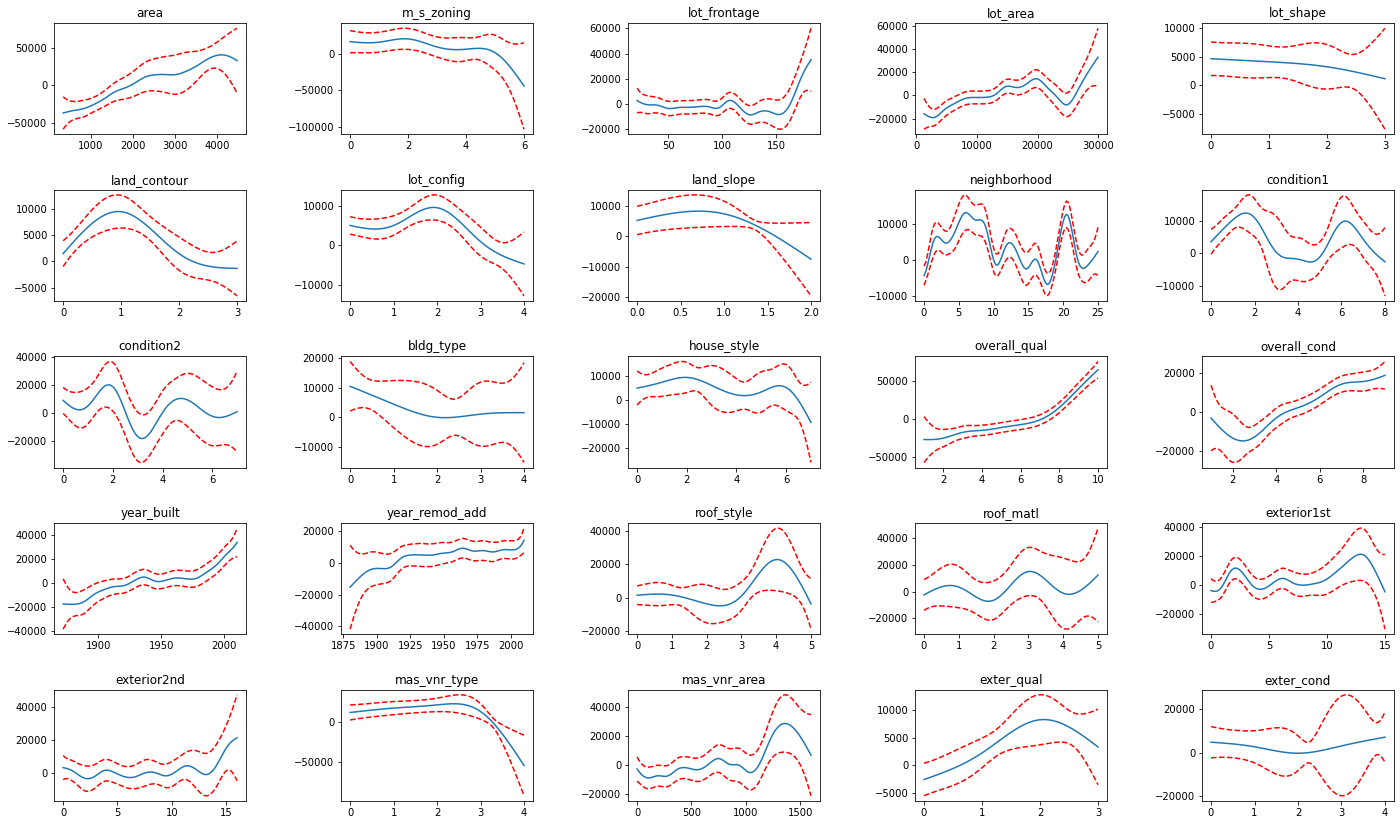

In [73]:

## plotting
plt.figure(figsize=(50,20));

fig, axs = plt.subplots(5,5, constrained_layout=True, figsize=(24,13.5));
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)

# X_colnames = X.columns.tolist()

for num, ax in enumerate(axs):
    for j in range(5):

        chart_num=num*5+j

        XX = gam.generate_X_grid(term=chart_num)
        ax[j].plot(XX[:, chart_num], gam.partial_dependence(term=chart_num, X=XX))
        ax[j].plot(XX[:, chart_num], gam.partial_dependence(term=chart_num, X=XX, width=.95)[1], c='r', ls='--')
#         if chart_num == 0:
#             ax[j].set_ylim(-1000,1000)
        ax[j].set_title(tot_cols[chart_num])

In [55]:
len(tot_cols)

76

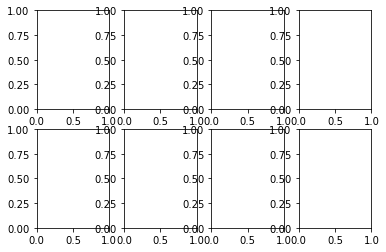

In [56]:
fig, axs = plt.subplots(2,4)

In [61]:
list(enumerate(axs))

[(0,
  array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        dtype=object)),
 (1,
  array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        dtype=object))]